In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from statsmodels.tsa.stattools import coint, adfuller
import pandas_ta as ta
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
idx = pd.IndexSlice

In [2]:
tickers = ['JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'PNC', 'USB', 'AXP', 'CME', 'ICE', 'MMC', 'SCHW', 'BLK', 'NTRS']  # Add more tickers as needed

# Define the date range
start_date = "2017-06-01"
end_date = "2020-06-30"

# Create an empty DataFrame to store the stock data
stock_data = pd.DataFrame()

# Fetch stock data for each ticker
for ticker in tickers:
    
    stock_df = yf.download(ticker, start= start_date,end=end_date)
    if 'Adj Close' in stock_df:
        stock_data[ticker] = stock_df['Adj Close']

# Display the first few rows of the stock data
print(stock_data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [3]:
stock_data

,JPM,BAC,WFC,C,GS,MS,PNC,USB,AXP,CME,ICE,MMC,SCHW,BLK,NTRS
Date,,,,,,,,,,,,,,,
2017-06-01,68.987938,19.647415,43.480667,49.999947,188.629303,35.790535,98.266953,40.850166,71.293503,94.619881,55.470612,69.445023,36.624363,352.050232,74.959831
2017-06-02,68.639099,19.491138,43.255241,50.024502,187.137878,35.714931,97.473480,40.667843,71.484749,93.905113,55.452236,69.579689,35.932457,353.182922,74.547127
2017-06-05,68.763702,19.456409,43.180115,50.139111,187.734497,36.025719,96.999031,40.691620,71.921921,94.917053,56.720871,69.471939,36.070831,352.765625,74.732414
2017-06-06,68.904892,19.300133,43.255241,49.942638,188.208221,36.067726,96.647293,40.334888,71.812599,94.138046,56.582970,68.987129,35.720276,352.433472,73.797531
2017-06-07,69.693924,19.621370,43.489014,50.654819,189.304855,36.353298,98.078804,40.541004,72.686935,96.439812,58.485920,69.032028,35.858662,352.407928,75.128265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-23,88.240753,22.930960,25.455814,46.768467,189.425674,43.404171,96.084641,33.315788,94.774422,154.085114,89.584236,100.442001,34.379856,511.782715,73.505699
2020-06-24,85.294296,22.024454,24.418140,44.878300,183.172546,42.552227,92.204849,31.822615,91.018547,148.687073,86.911095,98.704010,32.377800,496.945312,69.952766
2020-06-25,88.267784,22.866207,25.586693,46.529991,191.571716,44.219879,94.942993,32.841072,93.277771,149.770218,88.942307,101.600655,32.646019,504.696106,71.094772


Text(0.5, 1.0, 'Assets Correlation Matrix')

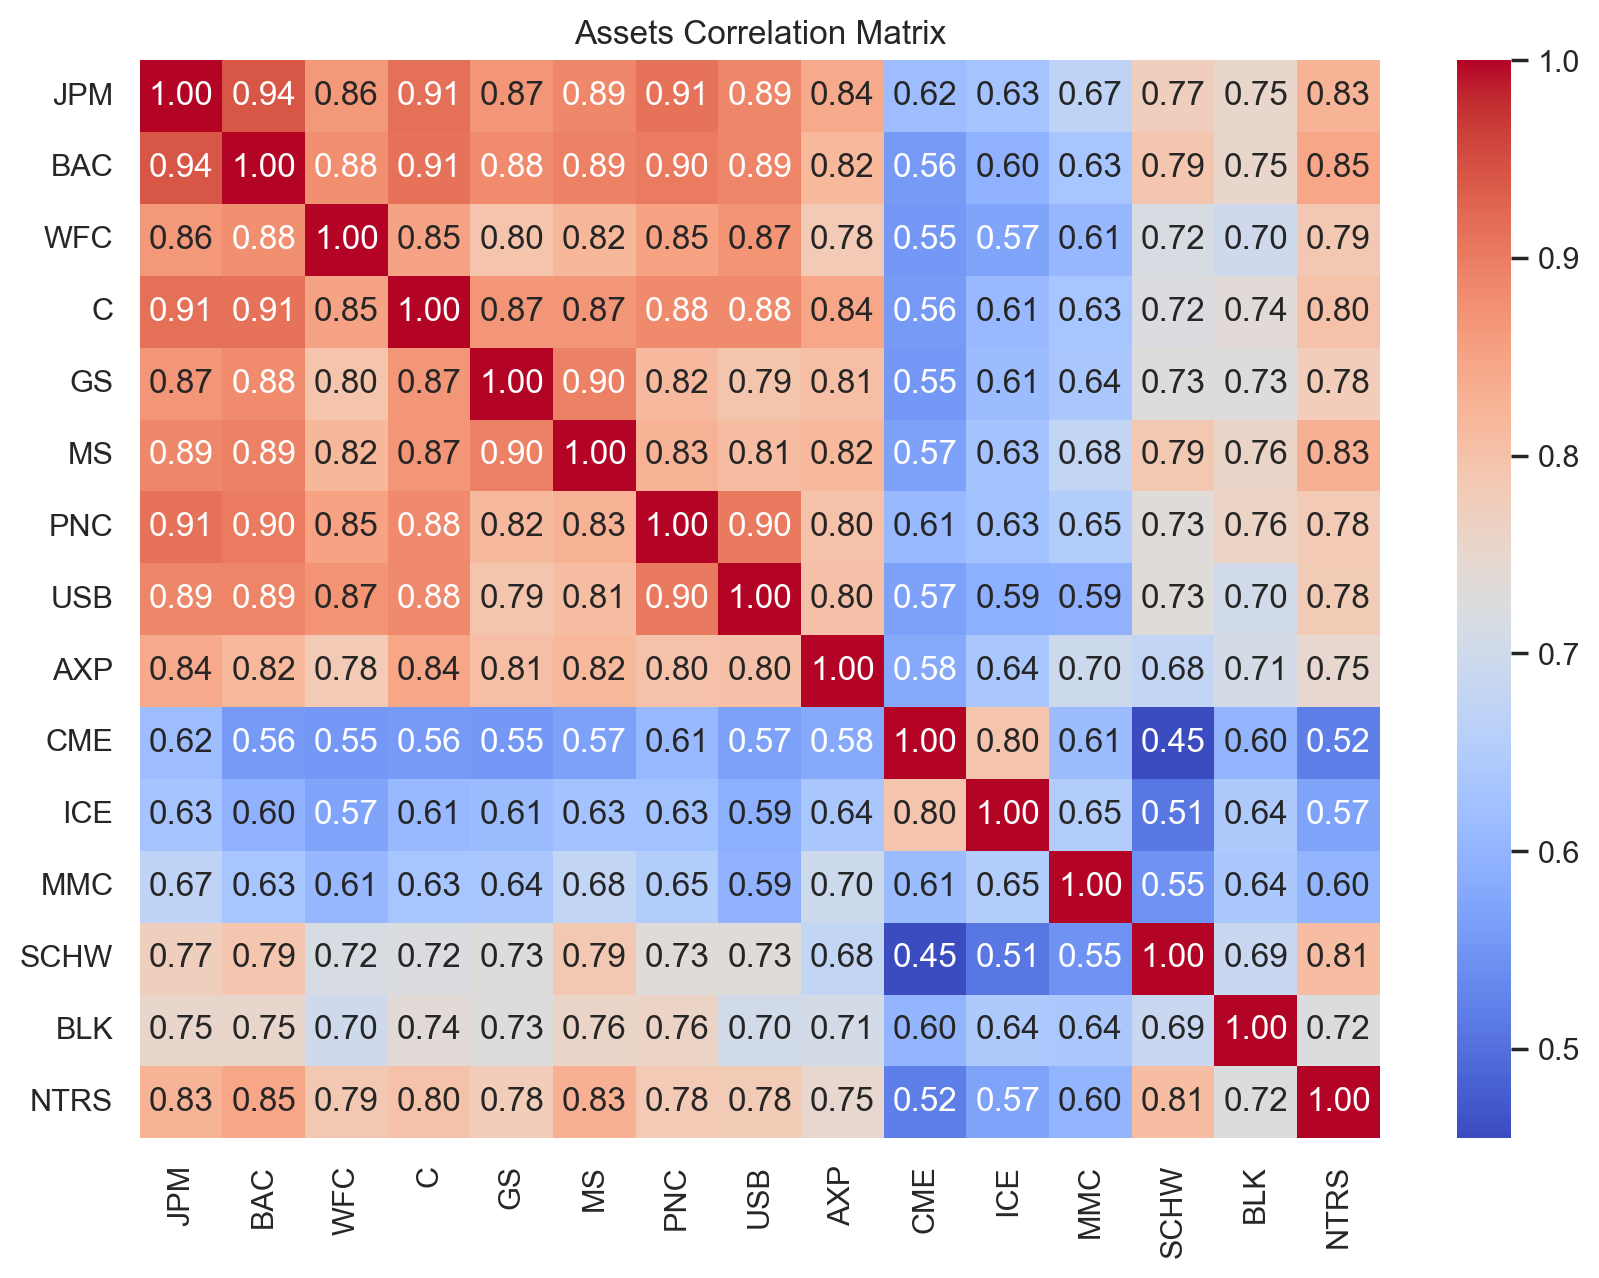

In [4]:
stock_data=stock_data.dropna()
train_close, test_close = train_test_split(stock_data, test_size=1, shuffle=False)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(train_close.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Correlation Matrix')

[('C', 'USB'), ('ICE', 'MMC')]


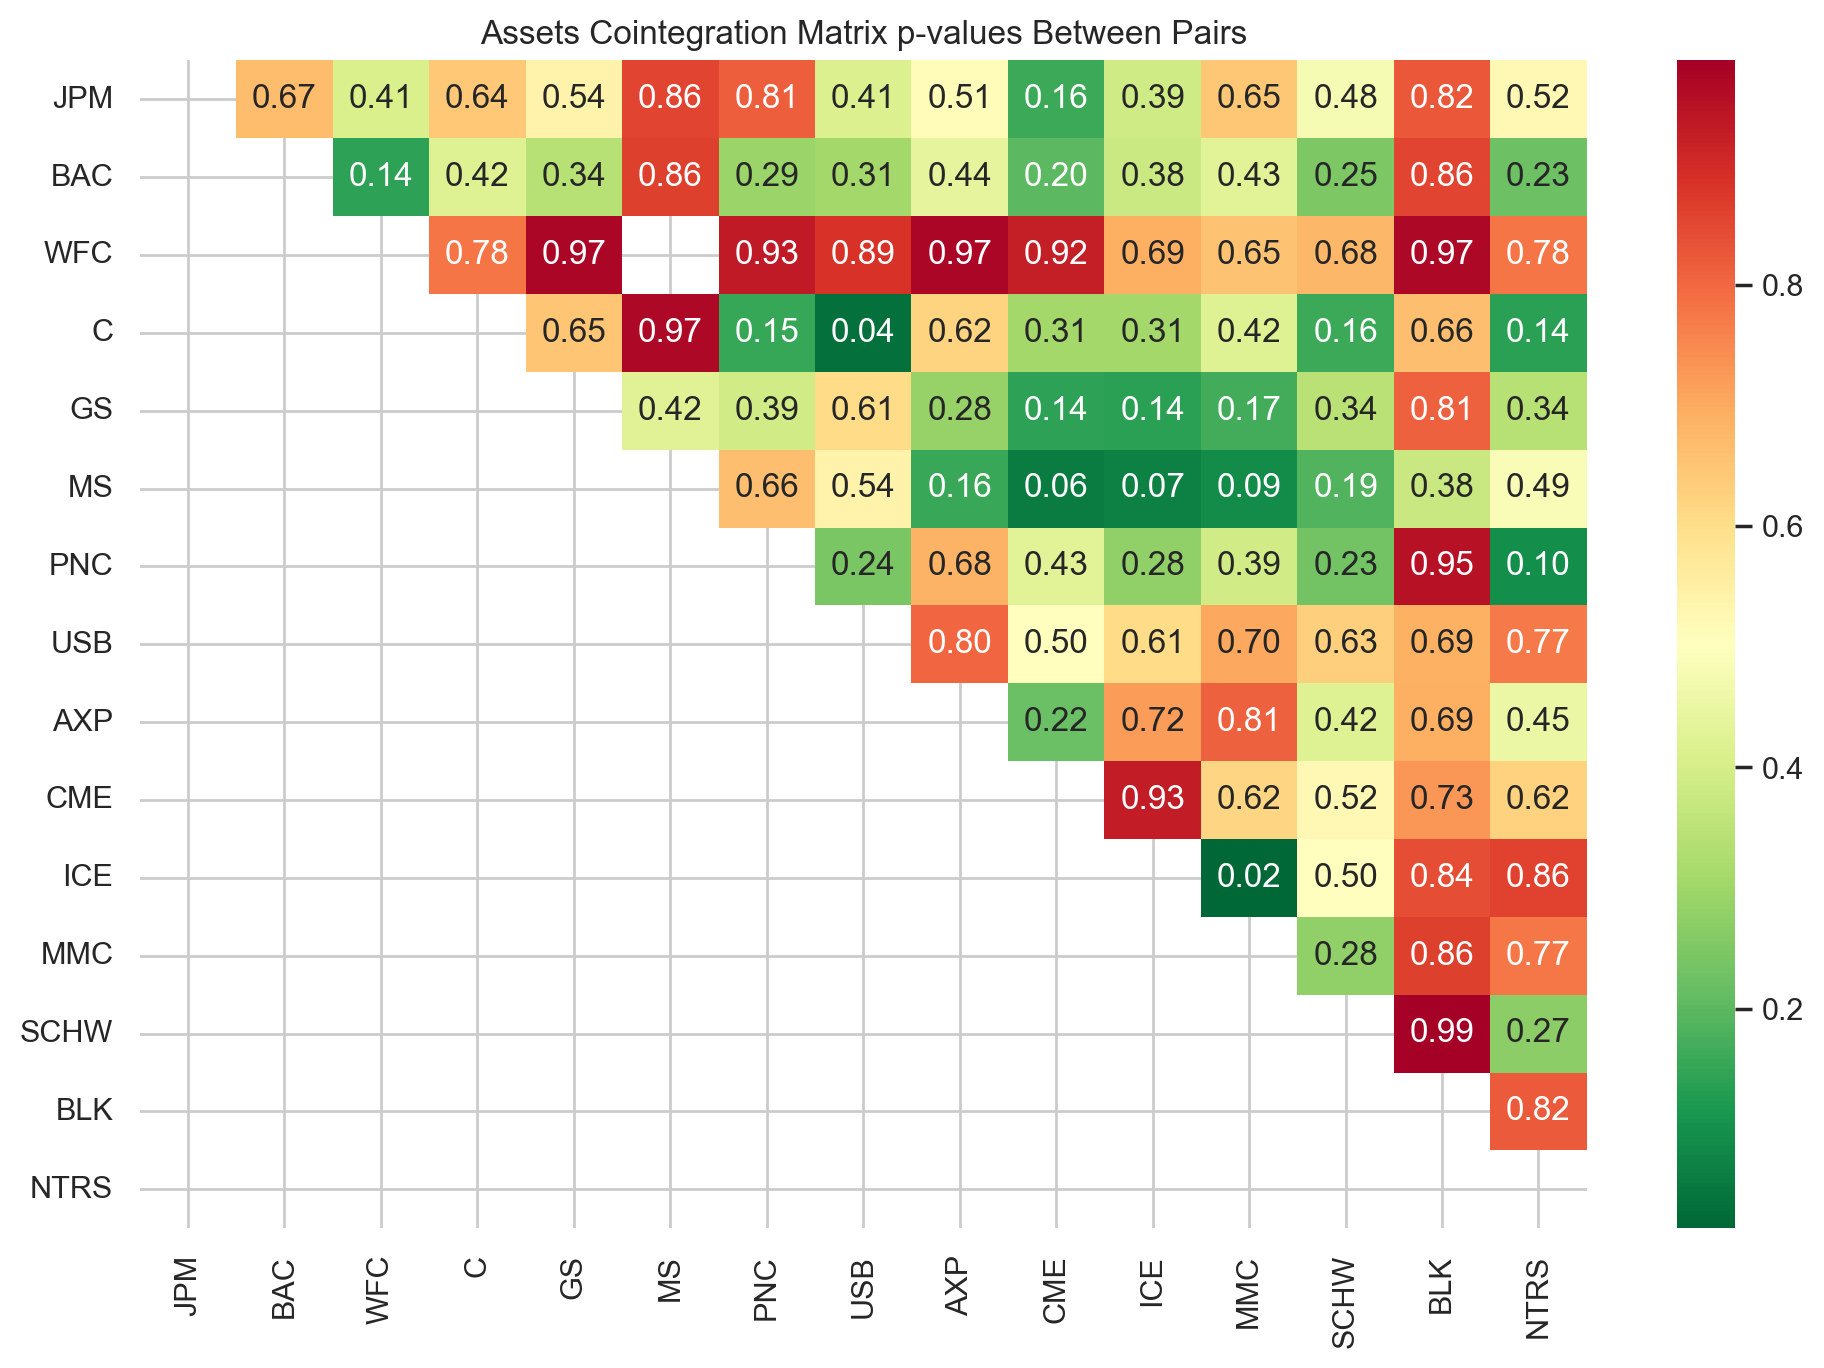

In [5]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs


# calculate p-values and plot as a heatmap
pvalues, pairs = find_cointegrated_pairs(train_close)
print(pairs)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = train_close.columns,
                yticklabels = train_close.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointegration Matrix p-values Between Pairs')
plt.tight_layout()

In [6]:
def check(pairs, selected):
    for stock_pair in pairs:
        
        S1 = stock_data[stock_pair[0]]
        S2 = stock_data[stock_pair[1]]
        S1 = sm.add_constant(S1)
        results = sm.OLS(S2, S1).fit()
        S1 = S1[stock_pair[0]]
        b = results.params[stock_pair[0]]
        spread = np.log(S2) - b * np.log(S1)
        adf = adfuller(spread, maxlag=1)
        if adf[0] < adf[4]['5%'] :
            selected.append(stock_pair)

    return selected

In [7]:
# selected=pairs 
pairs=check(pairs,[])

In [8]:
pairs

[('ICE', 'MMC')]

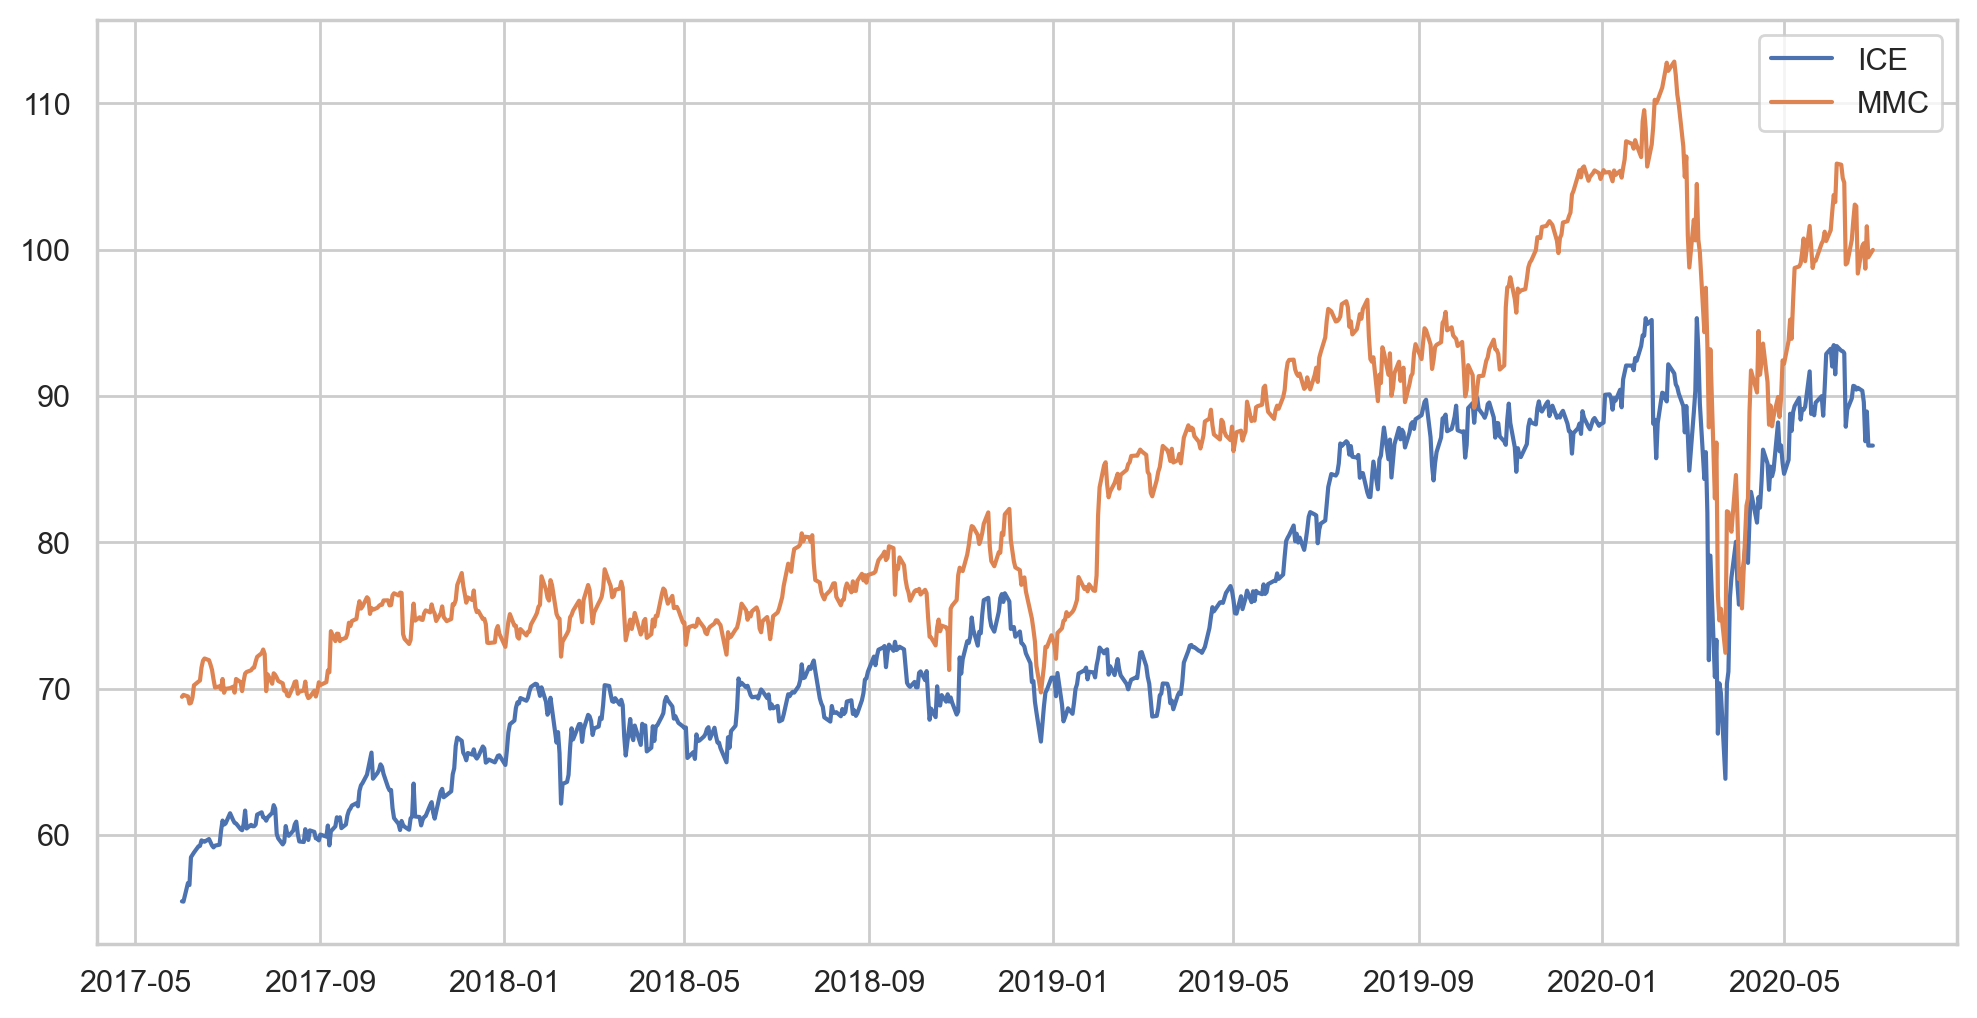

In [9]:
plt.figure(figsize = (12, 6))
plt.plot(stock_data['ICE'], label = 'ICE')
plt.plot(stock_data['MMC'], label = 'MMC')
plt.legend()
plt.show()

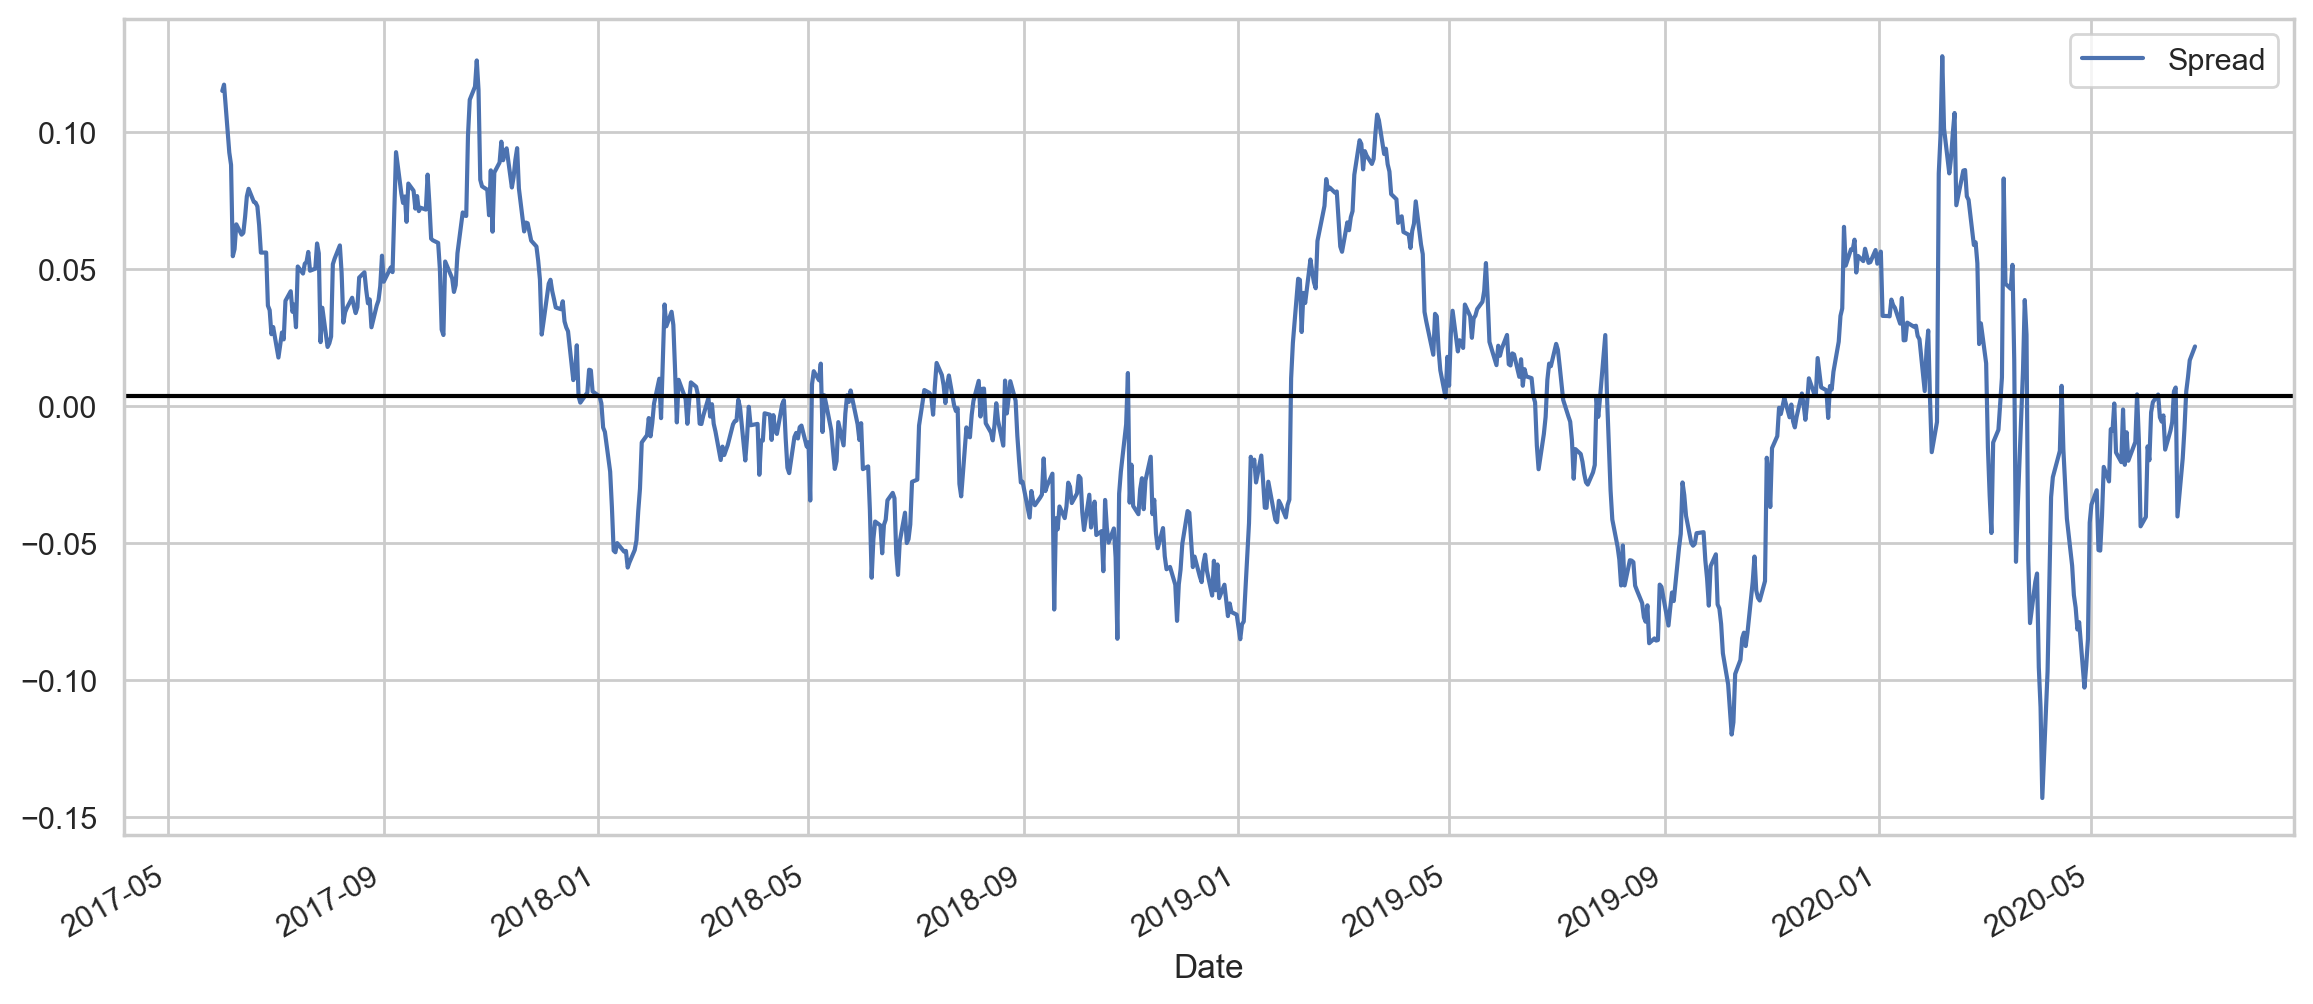

In [10]:
stock_pair = ['ICE', 'MMC']


S1=stock_data[stock_pair[0]]
S2=stock_data[stock_pair[1]]

S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1[stock_pair[0]]
b = results.params[stock_pair[0]]

spread = np.log(S2) - b * np.log(S1)
spread.plot(figsize=(14, 6))
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread'])

In [11]:
# conduct Augmented Dickey-Fuller test
adf = adfuller(spread, maxlag = 1)
print('Critical Value = ', adf[0])

# probablity critical values
print(adf[4])

Critical Value =  -4.221807595459323
{'1%': -3.4388268991356936, '5%': -2.8652813916285518, '10%': -2.5687622857867782}


In [12]:
### **TESTING ***

The strategy will use a 3 year testing period from JULY 2020 to JULY 2023. The spread between the prices of the two stocks will be used to determine points of entry and exit for the pairs trade.

[*********************100%%**********************]  2 of 2 completed


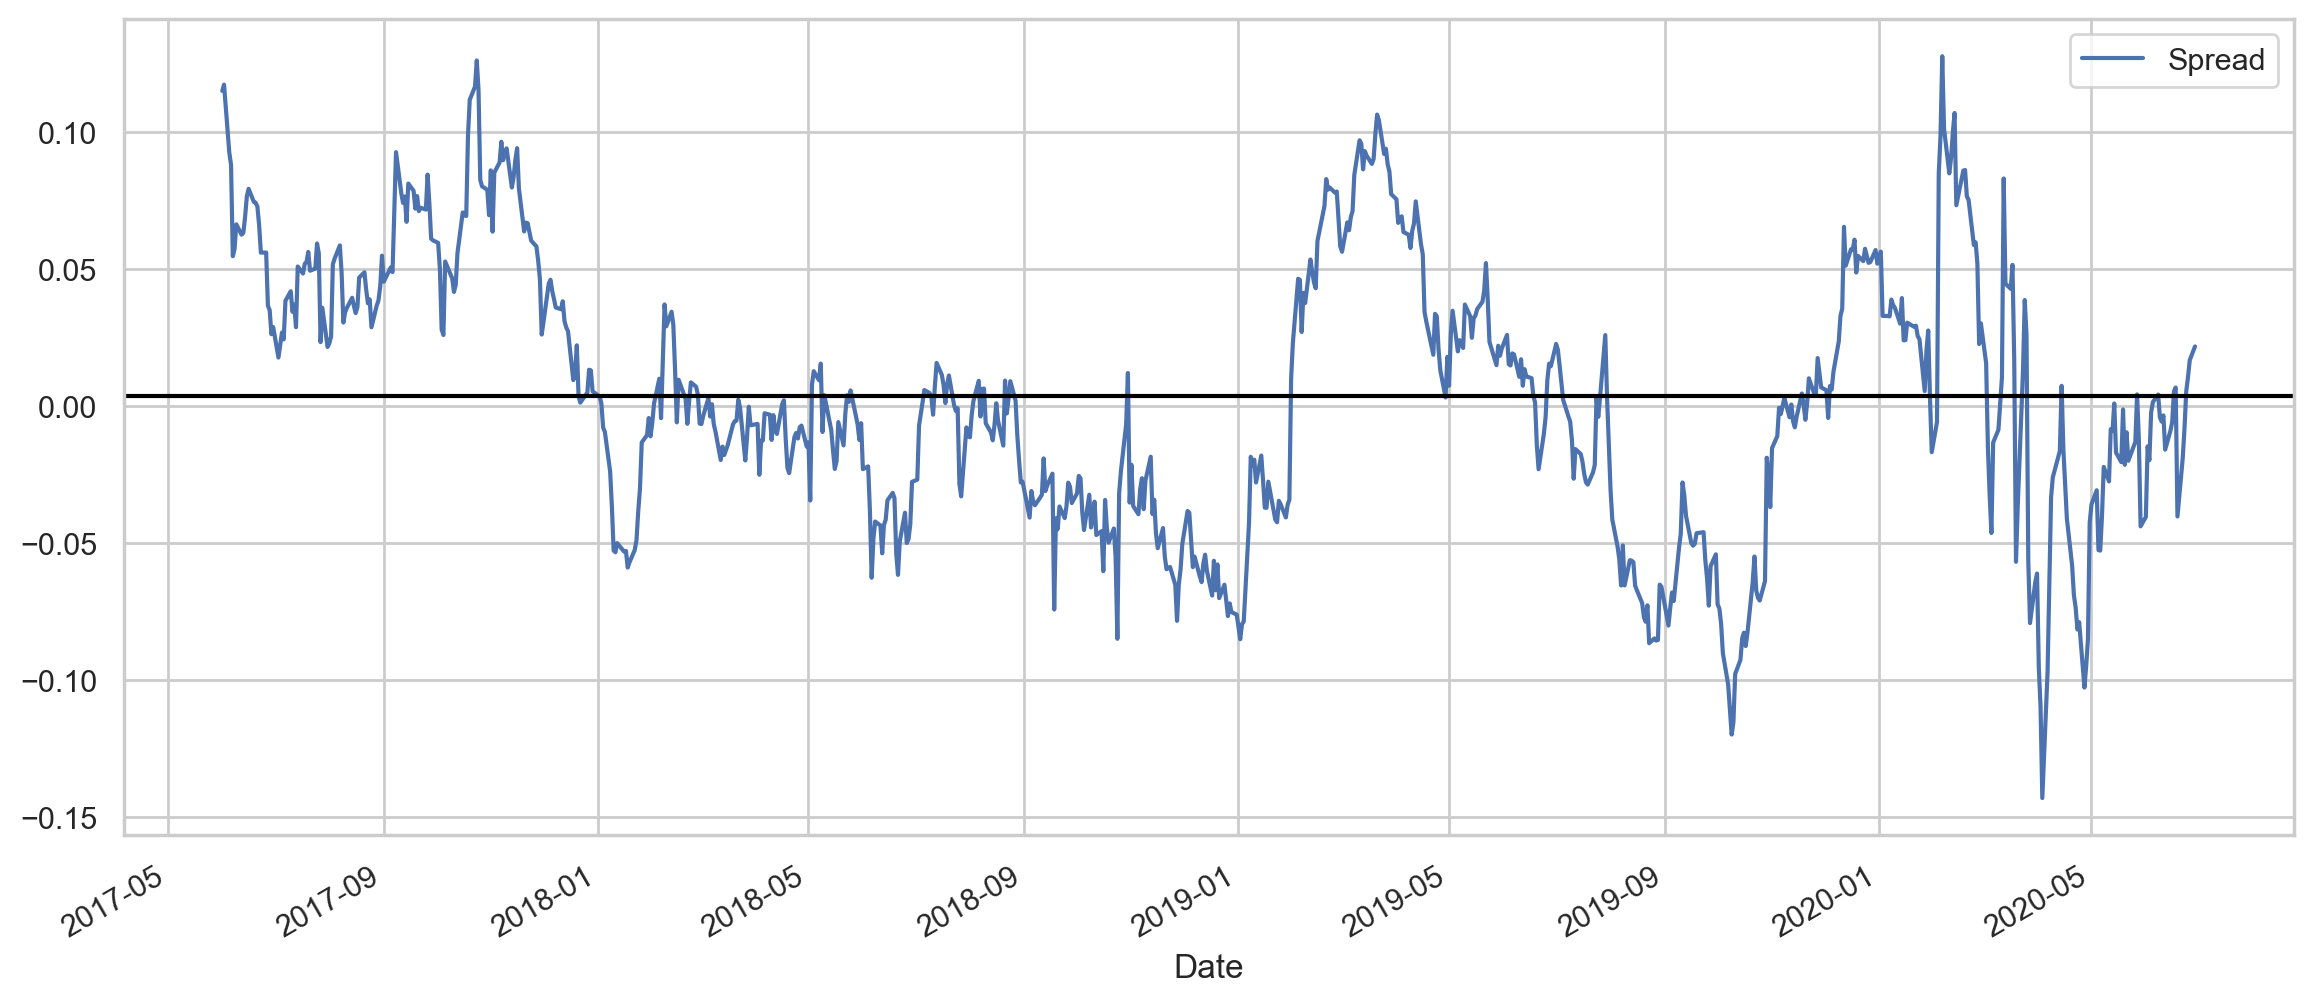

In [13]:
stock_pair = ['ICE', 'MMC']
asset_pairs =  yf.download(stock_pair, start="2020-07-01" ,end= "2023-07-30")['Adj Close']

S1=asset_pairs[stock_pair[0]]
S2=asset_pairs[stock_pair[1]]

S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1[stock_pair[0]]
b = results.params[stock_pair[0]]

spread = np.log(S2) - b * np.log(S1)
spread.plot(figsize=(14, 6))
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread'])

In [14]:
# # conduct Augmented Dickey-Fuller test
# adf = adfuller(spread, maxlag = 1)
# print('Critical Value = ', adf[0])

# # probablity critical values
# print(adf[4])

In [15]:
def zscore(series):
    lookback = 20
    scores = []
    for i in range(lookback, len(series)):
      window = series[i-lookback:i]
      scores.append((series[i]-window.mean())/window.std())
    return pd.Series(scores, index = series.index[lookback:])


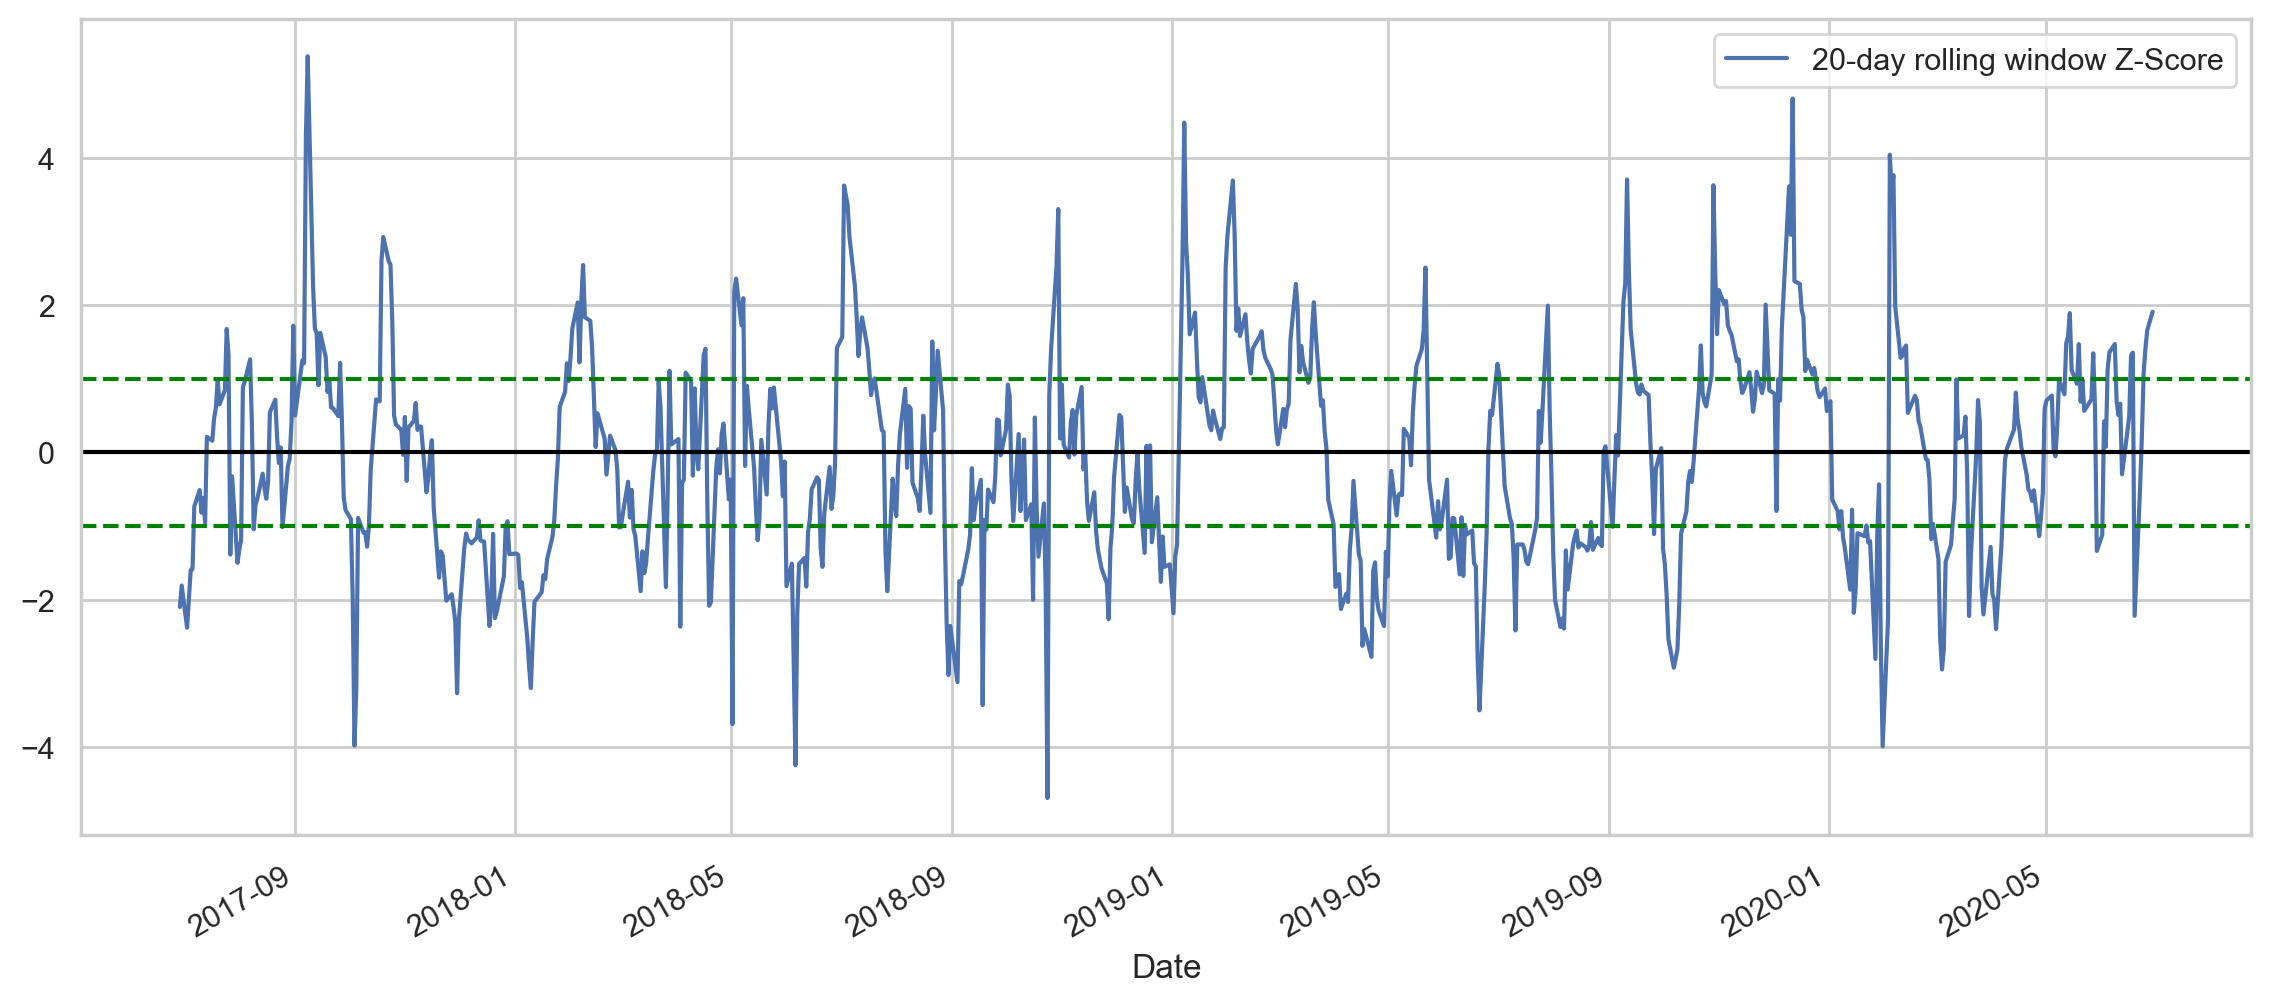

In [16]:
zscore(spread).plot(figsize=(14, 6))
plt.axhline(0.0, color='black')
plt.axhline(1.0, color='green', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['20-day rolling window Z-Score'])

In [17]:
def generate_trade_signals(S1, S2, spread):
  signals = pd.DataFrame()
  signals['price1'] = S1
  signals['price2'] = S2
  signals['spread'] = spread
  signals['zscore'] = zscore(spread)

  signals.dropna(inplace = True)

  signals['signal1'] = np.select([signals['zscore'] > 1, signals['zscore'] < -1], [1, -1], default = 0)
  signals['position1'] = signals['signal1'].diff()
  signals['signal2'] = -signals['signal1']
  signals['position2'] = signals['signal2'].diff()

  return signals

In [18]:
trade_signals = generate_trade_signals(S1, S2, spread)
trade_signals.dropna(inplace = True)
trade_signals

,price1,price2,spread,zscore,signal1,position1,signal2,position2
Date,,,,,,,,
2017-06-30,60.788925,69.992676,0.028787,-1.806574,-1,0.0,1,0.0
2017-07-03,61.489780,70.037552,0.017652,-2.378634,-1,0.0,1,0.0
2017-07-05,61.028687,70.136337,0.026794,-1.597852,-1,0.0,1,0.0
2017-07-06,60.835030,69.732300,0.024281,-1.582112,-1,0.0,1,0.0
2017-07-07,60.788925,70.666061,0.038362,-0.732636,0,1.0,0,-1.0
...,...,...,...,...,...,...,...,...
2020-06-23,89.584236,100.441978,-0.008387,0.200039,0,0.0,0,0.0
2020-06-24,86.911095,98.704025,0.005280,1.078248,1,1.0,-1,-1.0
2020-06-25,88.942307,101.600639,0.010470,1.408811,1,0.0,-1,0.0


In [19]:
def plot_pair_trades(trade_signals):
  fig = plt.figure(figsize=(14, 6))
  bx = fig.add_subplot(111)
  series = bx.plot(trade_signals['zscore'], c='#4abdac')
  long = bx.plot(trade_signals['zscore'][trade_signals['position1'] == -1], lw = 0, marker = '^', markersize = 8, c = 'g', alpha = 0.9)
  short = bx.plot(trade_signals['zscore'][trade_signals['position1'] == 1], lw = 0, marker = 'v', markersize = 8, c = 'r', alpha = 0.9)
  stock1 = stock_pair[0]
  stock2 = stock_pair[1]
  plt.title(f'{stock2} / {stock1}')
  plt.legend(['Z-Score', 'Long', 'Short'])

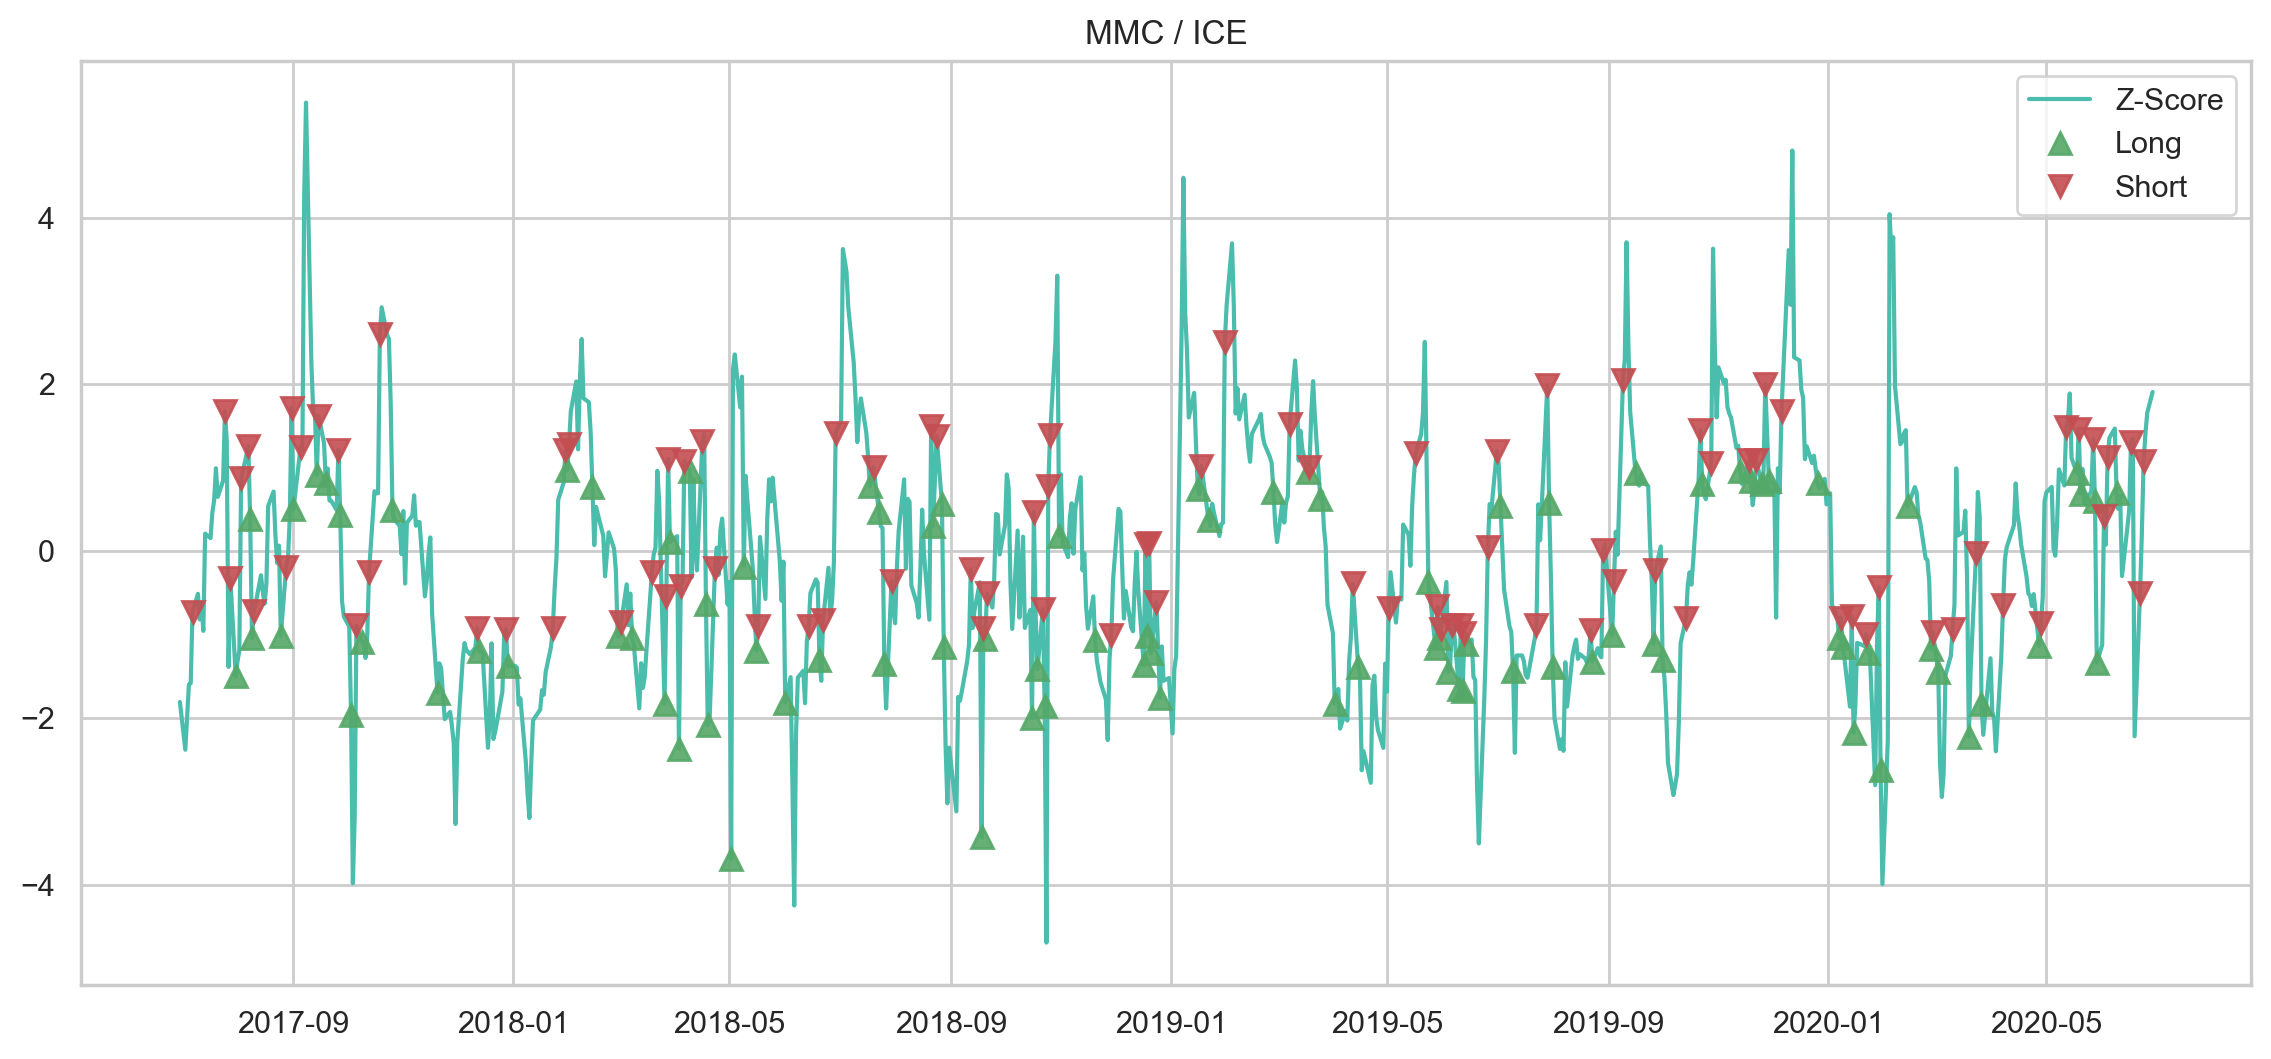

In [20]:
plot_pair_trades(trade_signals)

In [21]:
def plot_trades_1(signals):
  fig = plt.figure(figsize=(14,6))
  bx = fig.add_subplot(111)
  l1 = bx.plot(signals['price1'], c='#4abdac')
  u1 = bx.plot(signals['price1'][signals['position1'] == 1], lw=0, marker='^', markersize=7, c='g',alpha=0.9)
  u2, = bx.plot(signals['price1'][signals['position1'] == -1], lw=0, marker='v', markersize=7, c='r',alpha=0.9)
  plt.title(stock_pair[0])
  plt.legend(['Price', 'Long', 'Short'])

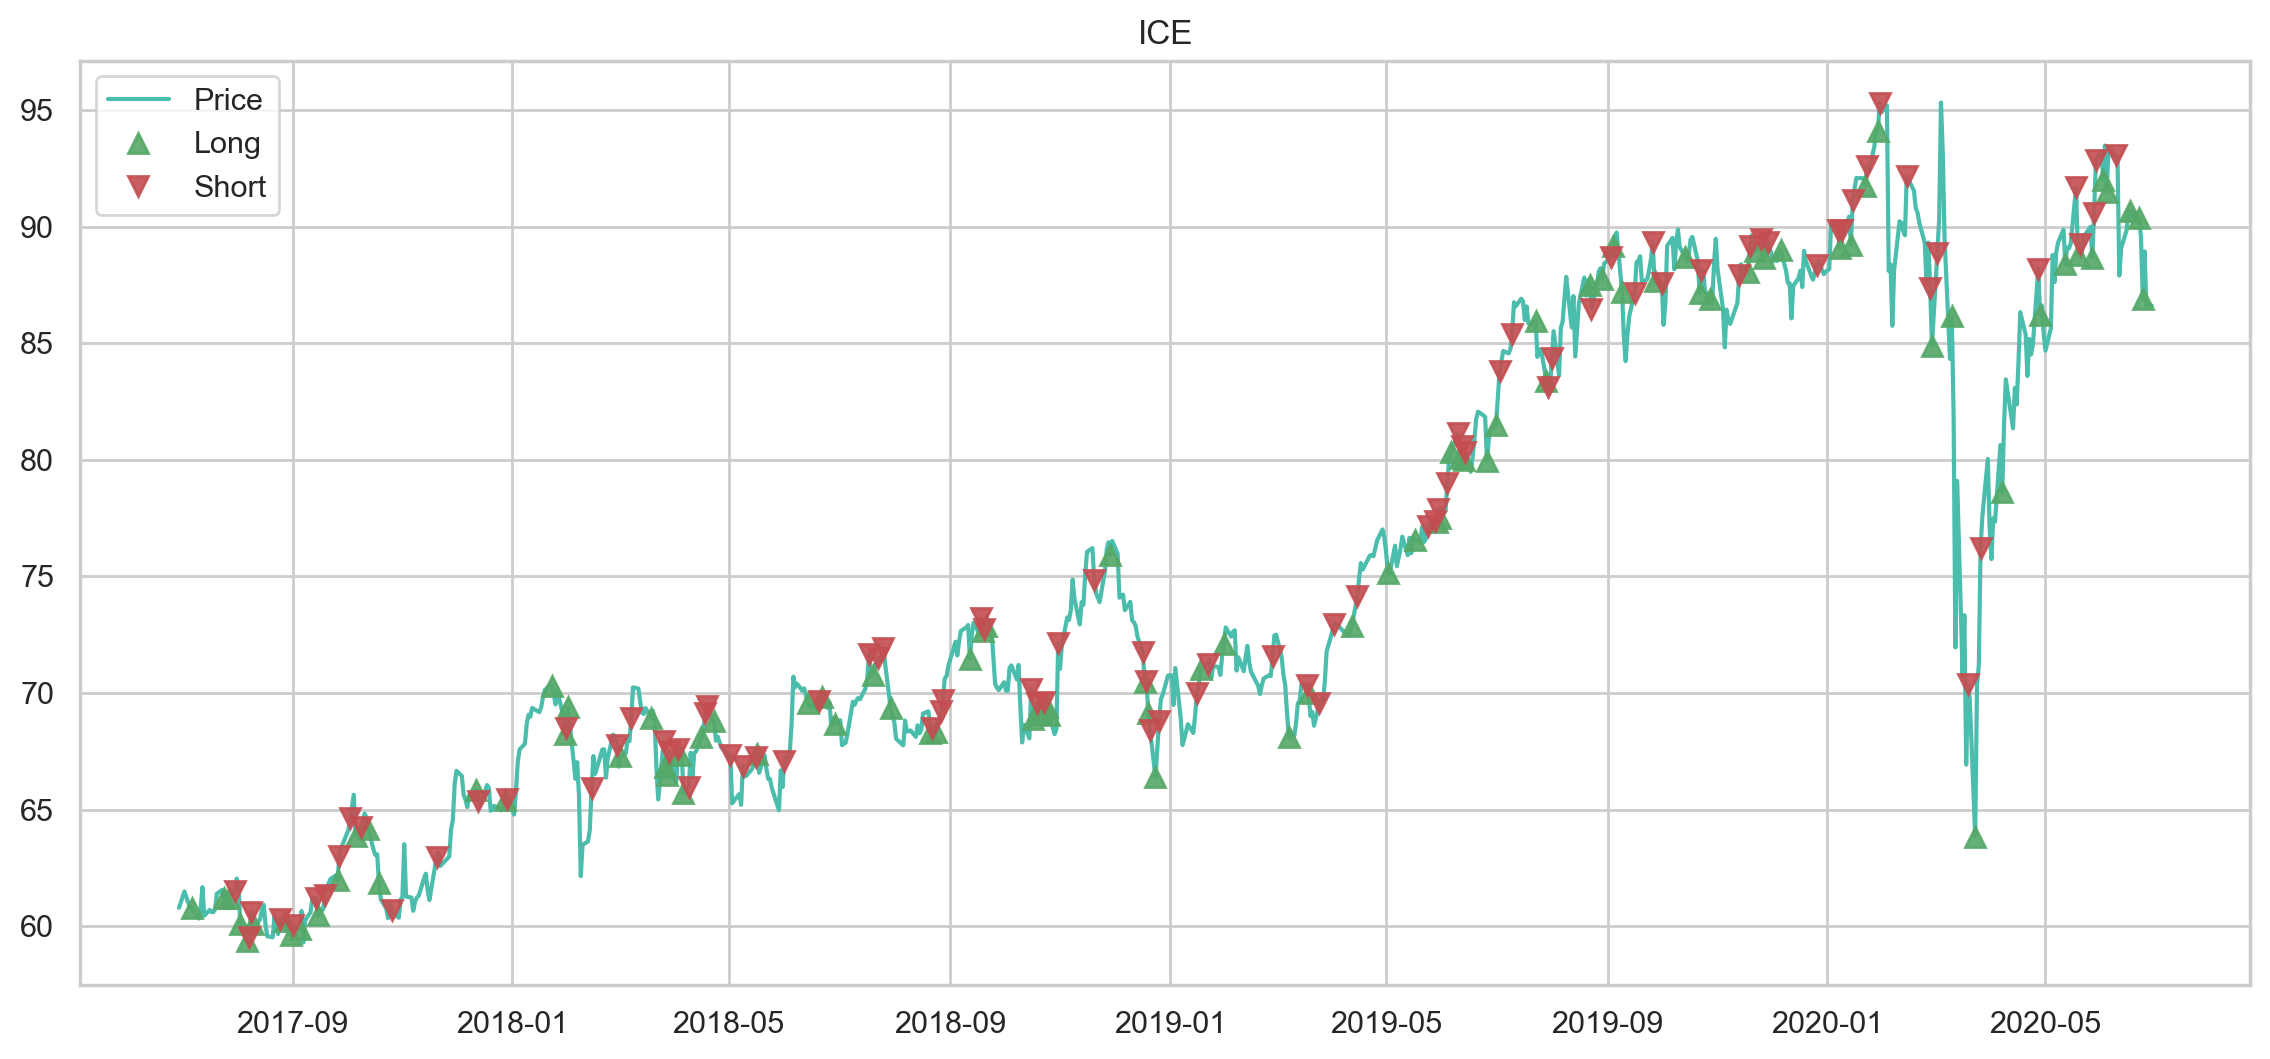

In [22]:
plot_trades_1(trade_signals)

In [23]:
def plot_trades_2(signals):
  fig=plt.figure(figsize=(14,6))
  bx = fig.add_subplot(111)
  l1 = bx.plot(signals['price2'], c='#4abdac')
  u1 = bx.plot(signals['price2'][signals['position2'] == 1], lw=0, marker='^', markersize=7, c='g',alpha=0.9)
  u2 = bx.plot(signals['price2'][signals['position2'] == -1], lw=0, marker='v', markersize=7, c='r',alpha=0.9)
  plt.title(stock_pair[1])
  plt.legend(['Price', 'Long', 'Short'])

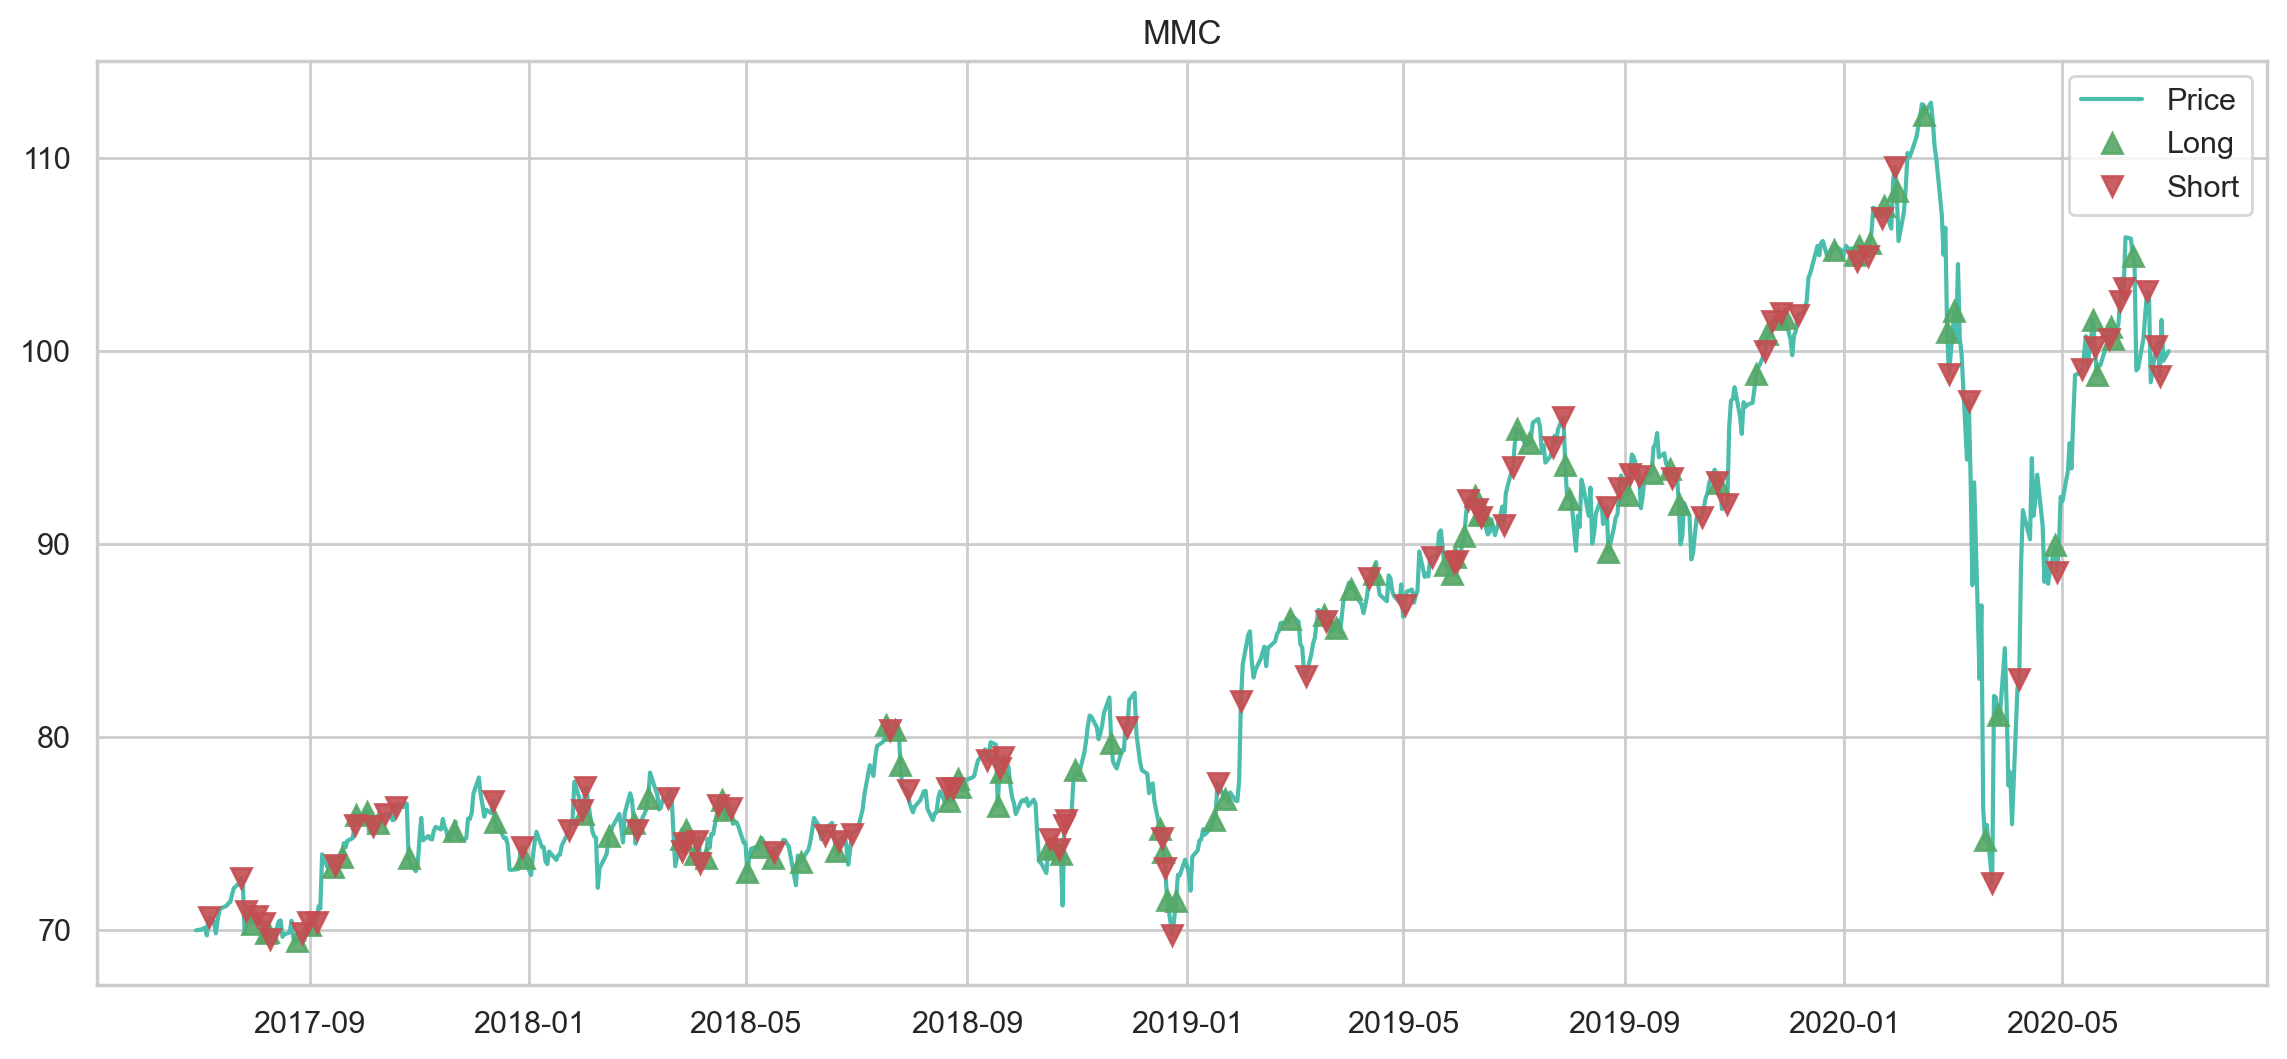

In [24]:
plot_trades_2(trade_signals)

## **Portfolio Performance**

### **PnL Calculation**

In [25]:
def pnl_calculation(signals):

  initial_capital = 50000

  # Shares to buy for each stock
  shares1 = initial_capital// (signals['price1'][0])
  shares2 = initial_capital// (signals['price2'][0])

  #PnL for stock 1
  portfolio = pd.DataFrame()
  portfolio['holdings1'] = signals['position1'].cumsum() * signals['price1'] * shares1
  portfolio['cash1'] = initial_capital - (signals['position1'] * signals['price1'] * shares1).cumsum()
  portfolio['total1'] = portfolio['holdings1'] + portfolio['cash1']
  portfolio['return1'] = portfolio['total1'].pct_change()

  # PnL for stock 2
  portfolio['holdings2'] = signals['position2'].cumsum() * signals['price2'] * shares2
  portfolio['cash2'] = initial_capital - (signals['position2'] * signals['price2'] * shares2).cumsum()
  portfolio['total2'] = portfolio['holdings2'] + portfolio['cash2']
  portfolio['return2'] = portfolio['total2'].pct_change()

  # Total PnL
  portfolio['total'] = portfolio['total1'] + portfolio['total2']
  portfolio = portfolio.dropna()

  return portfolio


In [37]:
portfolio = pnl_calculation(trade_signals)
portfolio.head(30)

,holdings1,cash1,total1,return1,holdings2,cash2,total2,return2,total
Date,,,,,,,,,
2017-07-03,0.000000,50000.000000,50000.000000,0.000000,0.000000,50000.000000,50000.000000,0.000000,100000.000000
2017-07-05,0.000000,50000.000000,50000.000000,0.000000,0.000000,50000.000000,50000.000000,0.000000,100000.000000
2017-07-06,0.000000,50000.000000,50000.000000,0.000000,0.000000,50000.000000,50000.000000,0.000000,100000.000000
2017-07-07,49968.496490,31.503510,50000.000000,0.000000,-50455.567841,100455.567841,50000.000000,0.000000,100000.000000
2017-07-10,49650.124512,31.503510,49681.628021,-0.006367,-50300.960083,100455.567841,50154.607758,0.003092,99836.235779
2017-07-11,49589.480438,31.503510,49620.983948,-0.001221,-49862.941086,100455.567841,50592.626755,0.008733,100213.610703
2017-07-12,49930.592377,31.503510,49962.095886,0.006874,-50346.069901,100455.567841,50109.497940,-0.009549,100071.593826
2017-07-13,50696.190880,31.503510,50727.694389,0.015324,-50719.657196,100455.567841,49735.910645,-0.007455,100463.605034
2017-07-14,49688.034897,31.503510,49719.538406,-0.019874,-50796.966522,100455.567841,49658.601318,-0.001554,99378.139725


In [27]:
def plot_portfolio_value(portfolio):

  fig = plt.figure(figsize=(14,6),)
  ax = fig.add_subplot(111)
  l1, = ax.plot(portfolio['total'], c='g')
  ax.set_ylabel('Asset Value')
  ax.yaxis.labelpad=15
  ax.set_xlabel('Date')
  ax.xaxis.labelpad=15
  plt.title('Portfolio Performance PnL')
  plt.legend(['Total Portfolio Value'])

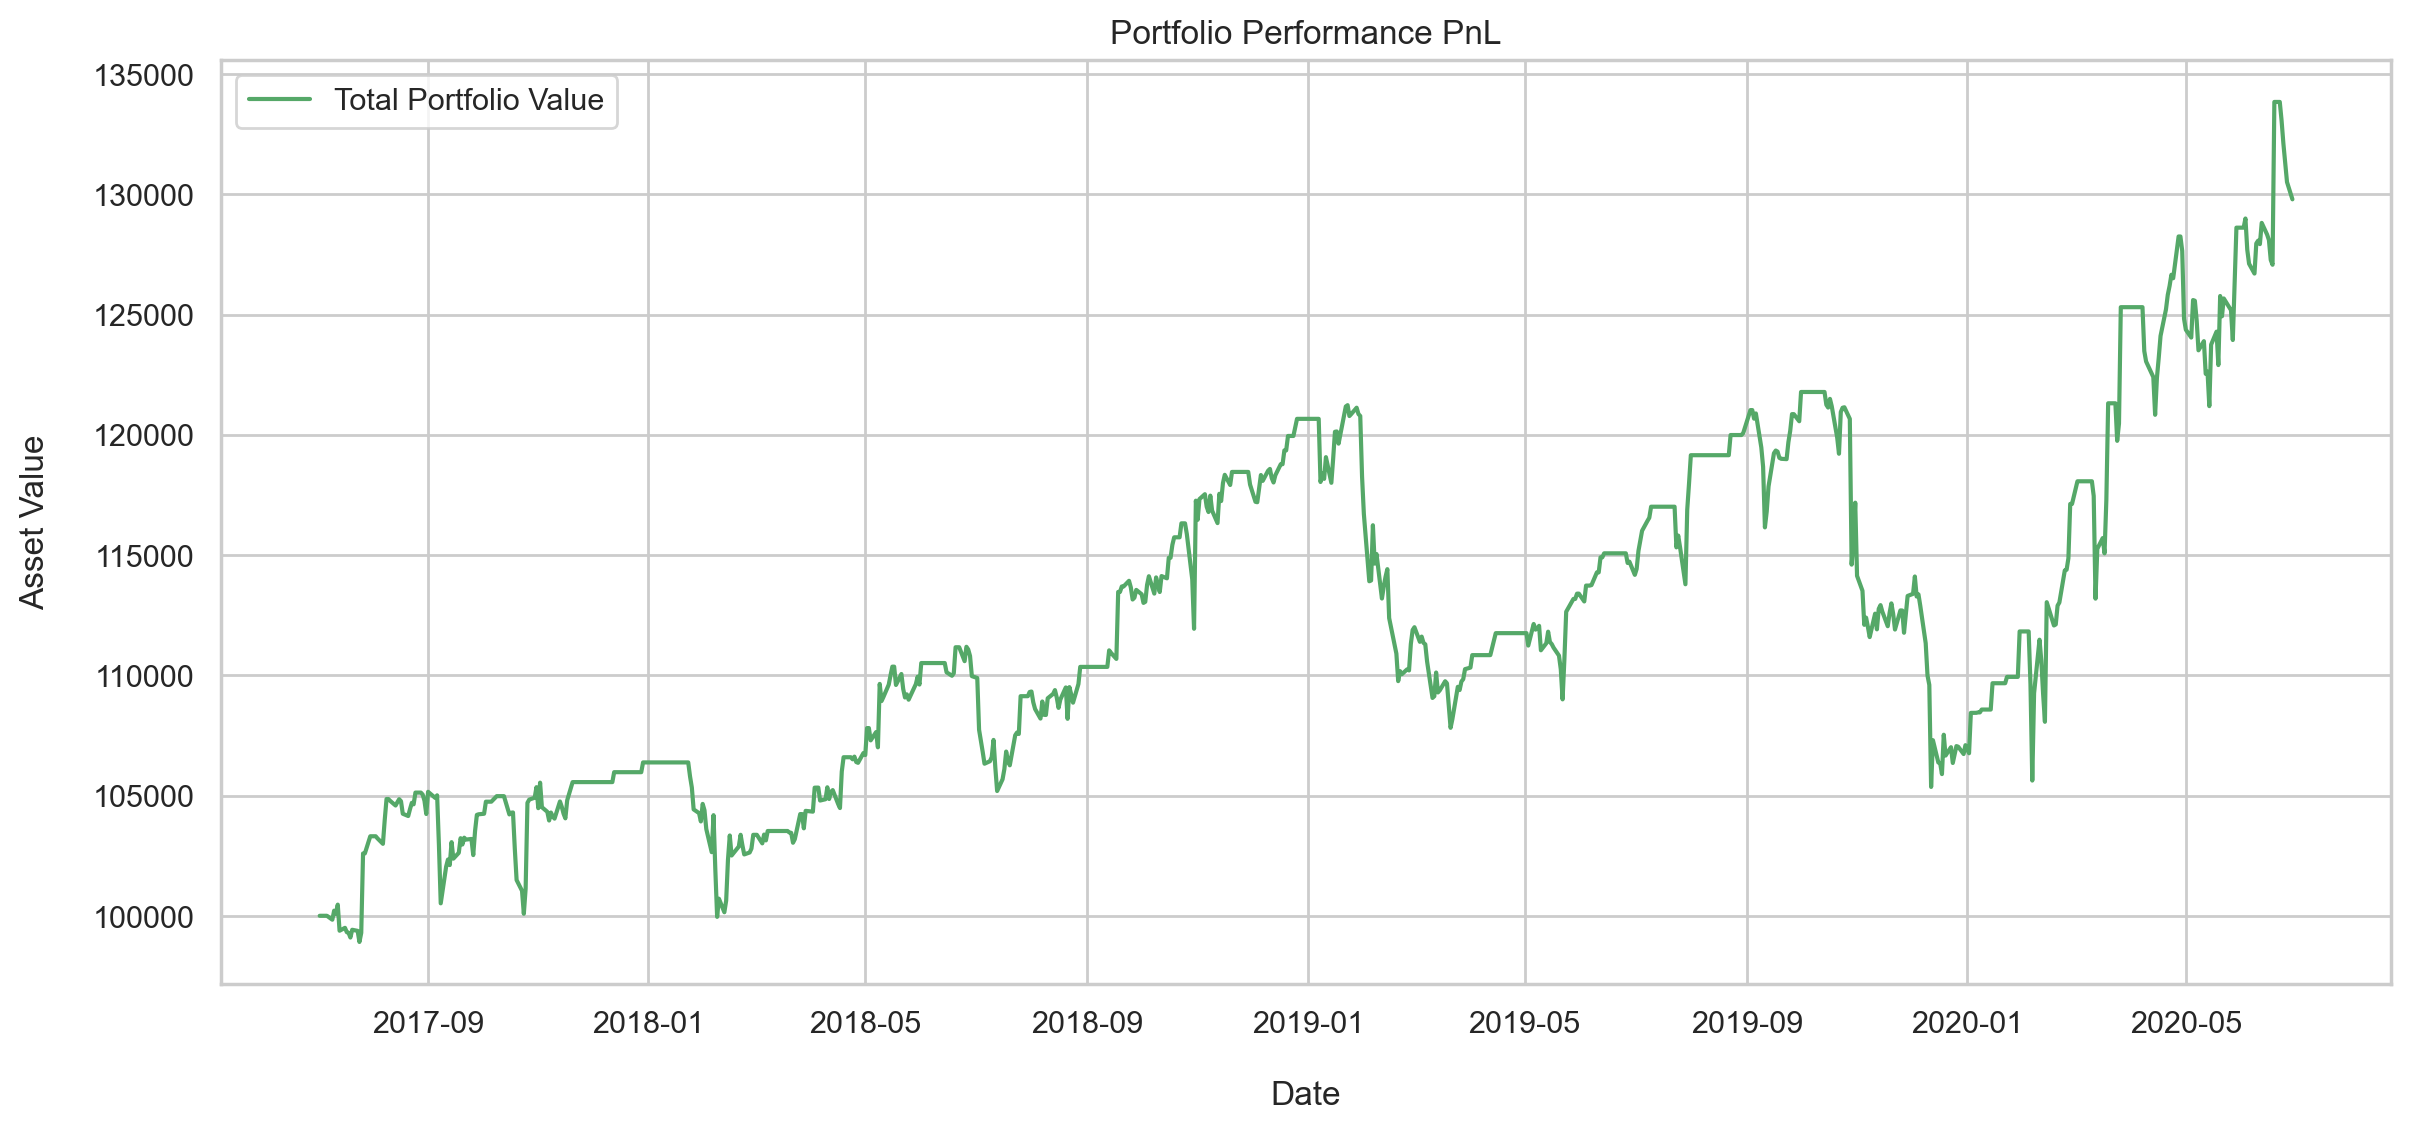

In [28]:
plot_portfolio_value(portfolio)

## **Portfolio Returns**

In [29]:
def calculate_cagr(portfolio):

  final_portfolio = portfolio['total'].iloc[-1]
  initial_portfolio = portfolio['total'].iloc[0]
  delta = len(portfolio.index)
  print('Number of trading days = ', delta)
  YEAR_DAYS = 252
  returns = (final_portfolio/initial_portfolio) ** (YEAR_DAYS/delta) - 1
  return returns

In [30]:
print('CAGR = {:.3f}%' .format(calculate_cagr(portfolio) * 100))

Number of trading days =  753
CAGR = 9.118%


Returns are also compared to a benchmark to assess the performance of the trading strategy in comparison to the overall market. For the purpose of this strategy, the NIFTY BANK index is taken as a benchmark.

<Axes: title={'center': 'DrawDown'}, xlabel='Date'>

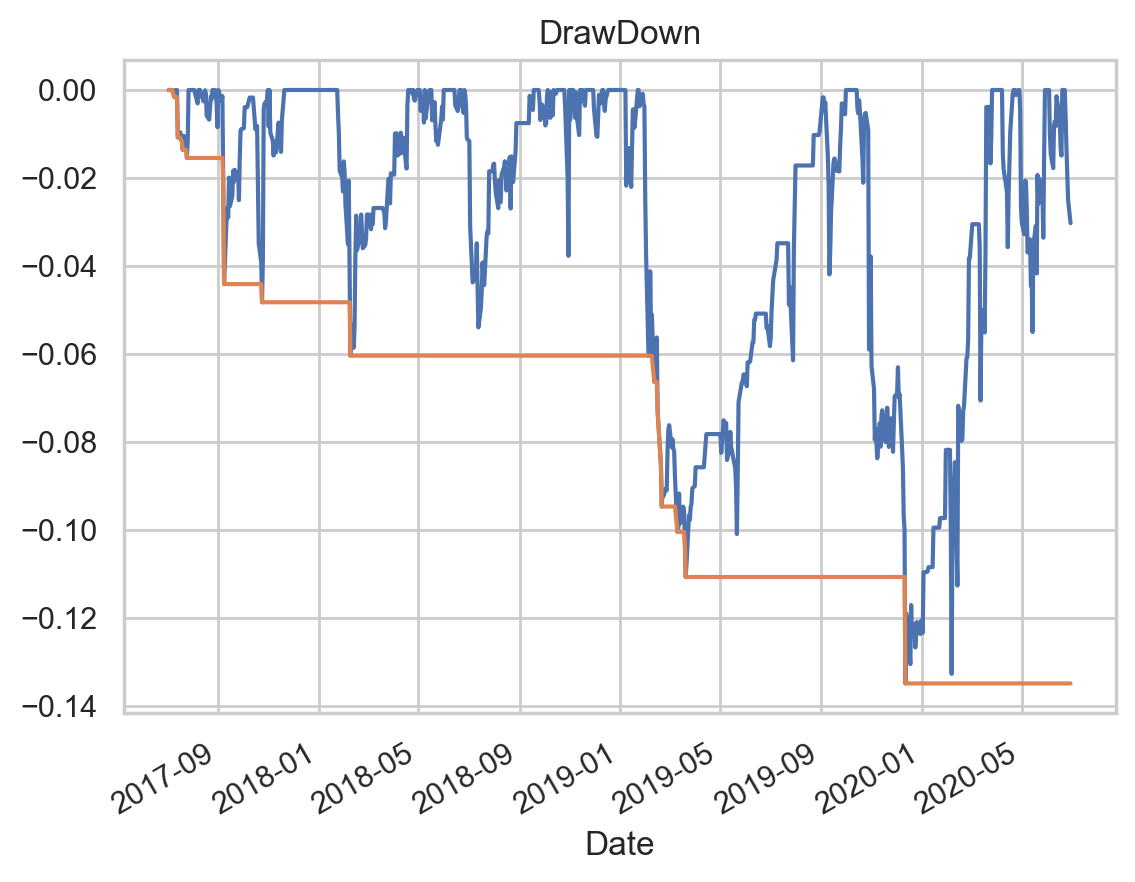

In [31]:


# We are going to use a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 252 days data have an expanding window
Roll_Max = portfolio['total'].rolling(window, min_periods=1).max()
Daily_Drawdown = portfolio['total']/Roll_Max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()

# Plot the results
plt.title('DrawDown')
Daily_Drawdown.plot()
Max_Daily_Drawdown.plot()


In [32]:
stock_returns =portfolio['total'].diff()
stock_returns

Date
2017-07-03           NaN
2017-07-05      0.000000
2017-07-06      0.000000
2017-07-07      0.000000
2017-07-10   -163.764221
                 ...    
2020-06-23   -773.559128
2020-06-24   -956.423721
2020-06-25   -797.052612
2020-06-26   -803.321503
2020-06-29   -718.761017
Name: total, Length: 753, dtype: float64

In [33]:

risk_free_rate = 0.03  # Replace with the current risk-free rate (e.g., 10-year Treasury yield)
stock_returns =portfolio['total'].diff()
# Calculate the average return and standard deviation of the portfolio
average_return = np.mean(stock_returns)
std_deviation = np.std(stock_returns)

# Calculate the excess return
excess_return = average_return - risk_free_rate

# Calculate the Sharpe Ratio
sharpe_ratio = excess_return / std_deviation

# Annualize the Sharpe Ratio if necessary (e.g., if your returns are daily)
# For daily data, you would typically use 252 trading days in a year.
# Replace with the appropriate number of periods per year for your data.
annualized_sharpe_ratio = sharpe_ratio * np.sqrt(252)

In [34]:
annualized_sharpe_ratio

0.6662077244447334